## Import packages and load data

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'survey lung cancer.csv'
df = pd.read_csv(path)

In [3]:
r,c = df.shape
print('This dataframe contains {} rows, {} columns'.format(r,c))

This dataframe contains 309 rows, 16 columns


In [4]:
pd.set_option('display.max_columns', None)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
df.isnull().sum() # no missing value

In [6]:
df.duplicated().sum() # we do have duplicated values, but I think in this case it is just fine

33

## EDA

In [7]:
# First let's see the male and female ratio of this data set
gender = df['GENDER'].value_counts() # M:F = 162:147
gender

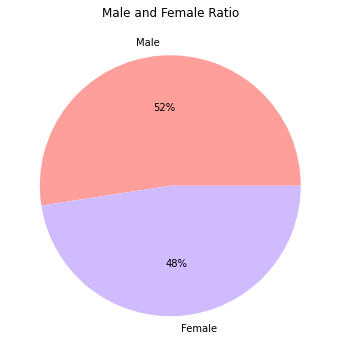

In [8]:
# visualize it using pie chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6)) # set canvas size
colors = sns.color_palette('pastel')[3:5] # define colors from seaborn
labels = ['Male', 'Female'] # define new labels

# plot pie chart
plt.pie(data=gender, x=gender.values, labels=labels, colors=colors, autopct='%0.f%%')
plt.title('Male and Female Ratio')
plt.show()

Let's see what are the average factors for male and female

In [9]:
df.groupby('GENDER').mean().round(1)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
GENDER,,,,,,,,,,,,,,
F,62.5,1.5,1.7,1.6,1.6,1.6,1.7,1.5,1.5,1.3,1.5,1.7,1.5,1.4
M,62.8,1.6,1.5,1.4,1.4,1.4,1.6,1.6,1.6,1.8,1.6,1.6,1.4,1.7


- The mean age of investigation is around 63
- We see that in some factors, men have more serious symptoms and vice versa.

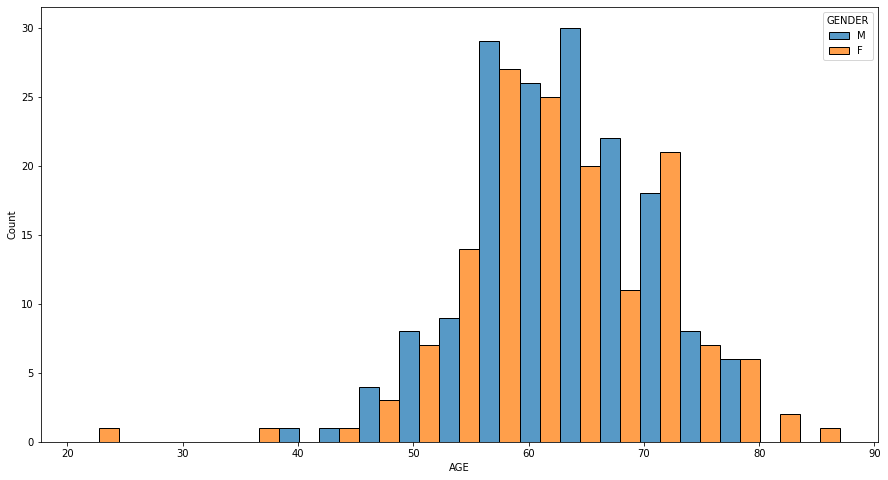

In [10]:
# Let's see the age distribution more clearly
# first encode gender variable
df['gender'] = np.where(df['GENDER'].str.contains('M'), 1, 0)

# build a histogram for age / gender
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='AGE', hue='GENDER', multiple='dodge')
plt.show()

Based on the histogram, distribution of male and female is similar, they are both centered around 63 

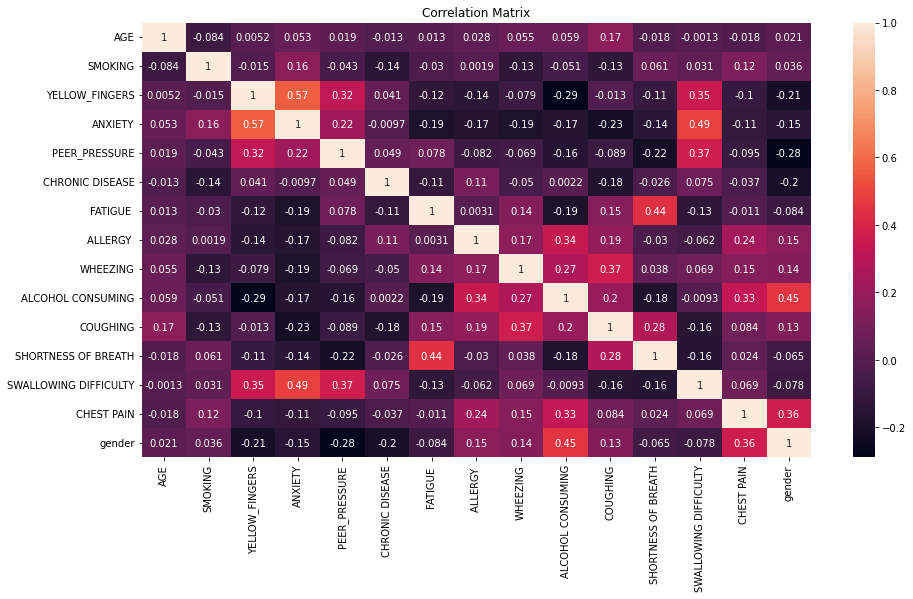

In [11]:
# let's build a correlation matrix and visualize it
corr = df.corr()
# create plot
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In the heatmap, male represents positive correlation and female represents negative correlation based on the gender variable

## Predict Lung Cancer using Classification models

In [12]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,gender
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0


In [13]:
# create features and target variable
X = df.iloc[:, 1:15]
X['GENDER'] = df[['gender']]
y = df[['LUNG_CANCER']].to_numpy()

# Split sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)

In [14]:
# standardize sample values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Build a Logistic regression

In [15]:
# train a logistic regression
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(random_state=0).fit(X_train_std, y_train.ravel())

In [16]:
# predict lung cancer
y_pred = Lr.predict(X_test_std)

# see model perfermance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.50      0.40      0.44        10
         YES       0.91      0.94      0.93        68

    accuracy                           0.87        78
   macro avg       0.71      0.67      0.69        78
weighted avg       0.86      0.87      0.87        78



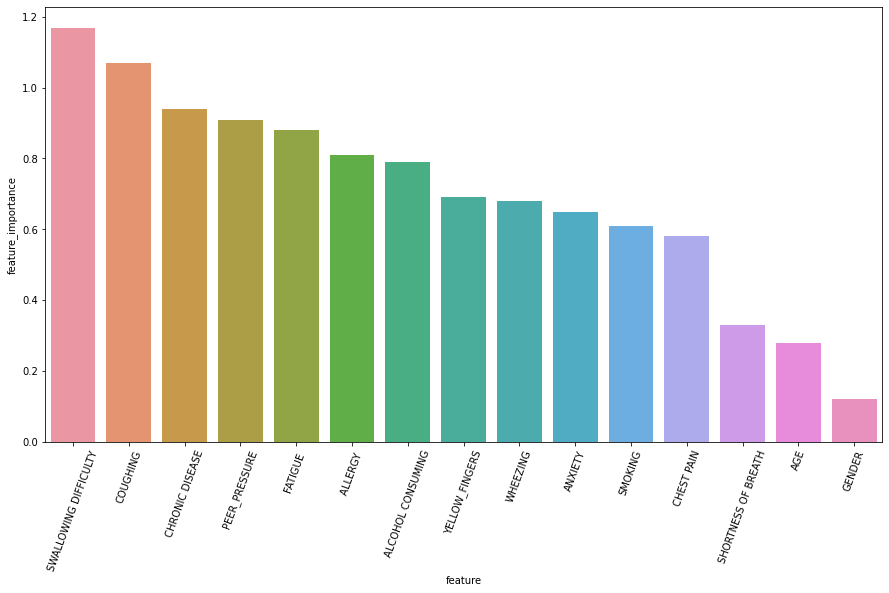

In [51]:
# see feature importance
feature_importance = pd.DataFrame({'feature':list(X.columns),'feature_importance':[abs(i) for i in Lr.coef_[0]]})
feature_importance = feature_importance.sort_values('feature_importance',ascending=False).round(2)
# plotting
plt.figure(figsize=(15,8))
sns.barplot(data=feature_importance, x='feature', y='feature_importance')
plt.xticks(rotation=70)
plt.show()

Based on feature importance, **swallowing difficulty** is mostly related to lung cancer, and then **coughing** as well as **chronic disease**

Build a SVM classifer

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svm = svm.SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svm_cv = GridSearchCV(svm, parameters).fit(X_train_std, y_train.ravel())

In [27]:
svm_cv.best_params_ # get best model parameters

{'C': 1, 'kernel': 'linear'}

In [24]:
svm_best = svm.SVC(kernel='linear', C=1).fit(X_train_std, y_train.ravel())

In [26]:
# predict lung cancer
y_pred_svm = svm_best.predict(X_test_std)

# see model perfermance
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          NO       0.56      0.50      0.53        10
         YES       0.93      0.94      0.93        68

    accuracy                           0.88        78
   macro avg       0.74      0.72      0.73        78
weighted avg       0.88      0.88      0.88        78



As we want to be as precise as possible, **Precision** is our first concern, **SVM** has higher precision (**88%**), so we will use it as our final model